In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


# ANALYSING THE DATA (EDA)

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [4]:
df.shape

(209593, 37)

In [5]:
df.info

<bound method DataFrame.info of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111670  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228330  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  las

In [6]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [7]:
# checking duplicates values in dataset:
df.duplicated().sum()

0

In [8]:
# Checking null values in dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [9]:
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

<AxesSubplot:>

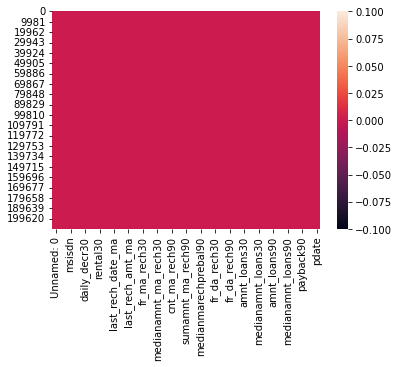

In [10]:
sns.heatmap(df.isnull())

In [11]:
# drop uncessary columns
df.drop(columns=['Unnamed: 0','pcircle'],axis=1,inplace=True)

df.drop('msisdn',axis=1,inplace=True)

In [14]:
# Taking days and month from pdate because years are same in all data is 2016
df['pmonth']=pd.to_datetime(df['pdate'],format="%d-%m-%Y").dt.month
df['pday']=pd.to_datetime(df['pdate'],format="%d-%m-%Y").dt.day
df.drop('pdate',axis=1,inplace=True)

In [16]:
# drop that columns have maximun zero values
df.drop(columns=['medianamnt_loans90','medianamnt_loans30','fr_da_rech90','last_rech_date_da','cnt_da_rech30','fr_da_rech30','cnt_da_rech90'],axis=1,inplace=True)
df.describe().T


,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755200
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377700
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000
cnt_ma_rech30,209593.0,3.978057,4.256090,0.000000,1.000,3.000000,5.00,203.000000
fr_ma_rech30,209593.0,3737.355121,53643.625172,0.000000,0.000,2.000000,6.00,999606.368100


# Median and maximum amount of loan taken by the user in last 30 days:

In [17]:
df.loc[(df['maxamnt_loans30']!=6.0)&(df['maxamnt_loans30']!=12.0)&(df['maxamnt_loans30']!=0.0),'maxamnt_loans30']


118       61907.69737
125       22099.41373
146       98745.93405
369       58925.36406
374       78232.46432
             ...     
209189    50824.99635
209262    17324.99458
209331    92864.50173
209392    54259.26569
209424    96927.24325
Name: maxamnt_loans30, Length: 1047, dtype: float64

In [18]:
df.loc[(df['maxamnt_loans30']!=6.0) & (df['maxamnt_loans30']!=12.0) &(df['maxamnt_loans30']!=0.0),'maxamnt_loans30']=0.0


In [19]:
# maximum amount of loan taken by the user in last 30 days:

df['maxamnt_loans30'].value_counts()

6.0     179193
12.0     26109
0.0       4291
Name: maxamnt_loans30, dtype: int64

In [20]:
# maximum amount of loan taken by the user in last 90 days

df['maxamnt_loans90'].value_counts()

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [21]:
# amnt_loan30 have 0 values mean that people not take laon so they not count in defualter or non-defualter:
df.drop(df[df['amnt_loans30']==0].index,inplace=True)

In [22]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
print(numerical_features)

['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']


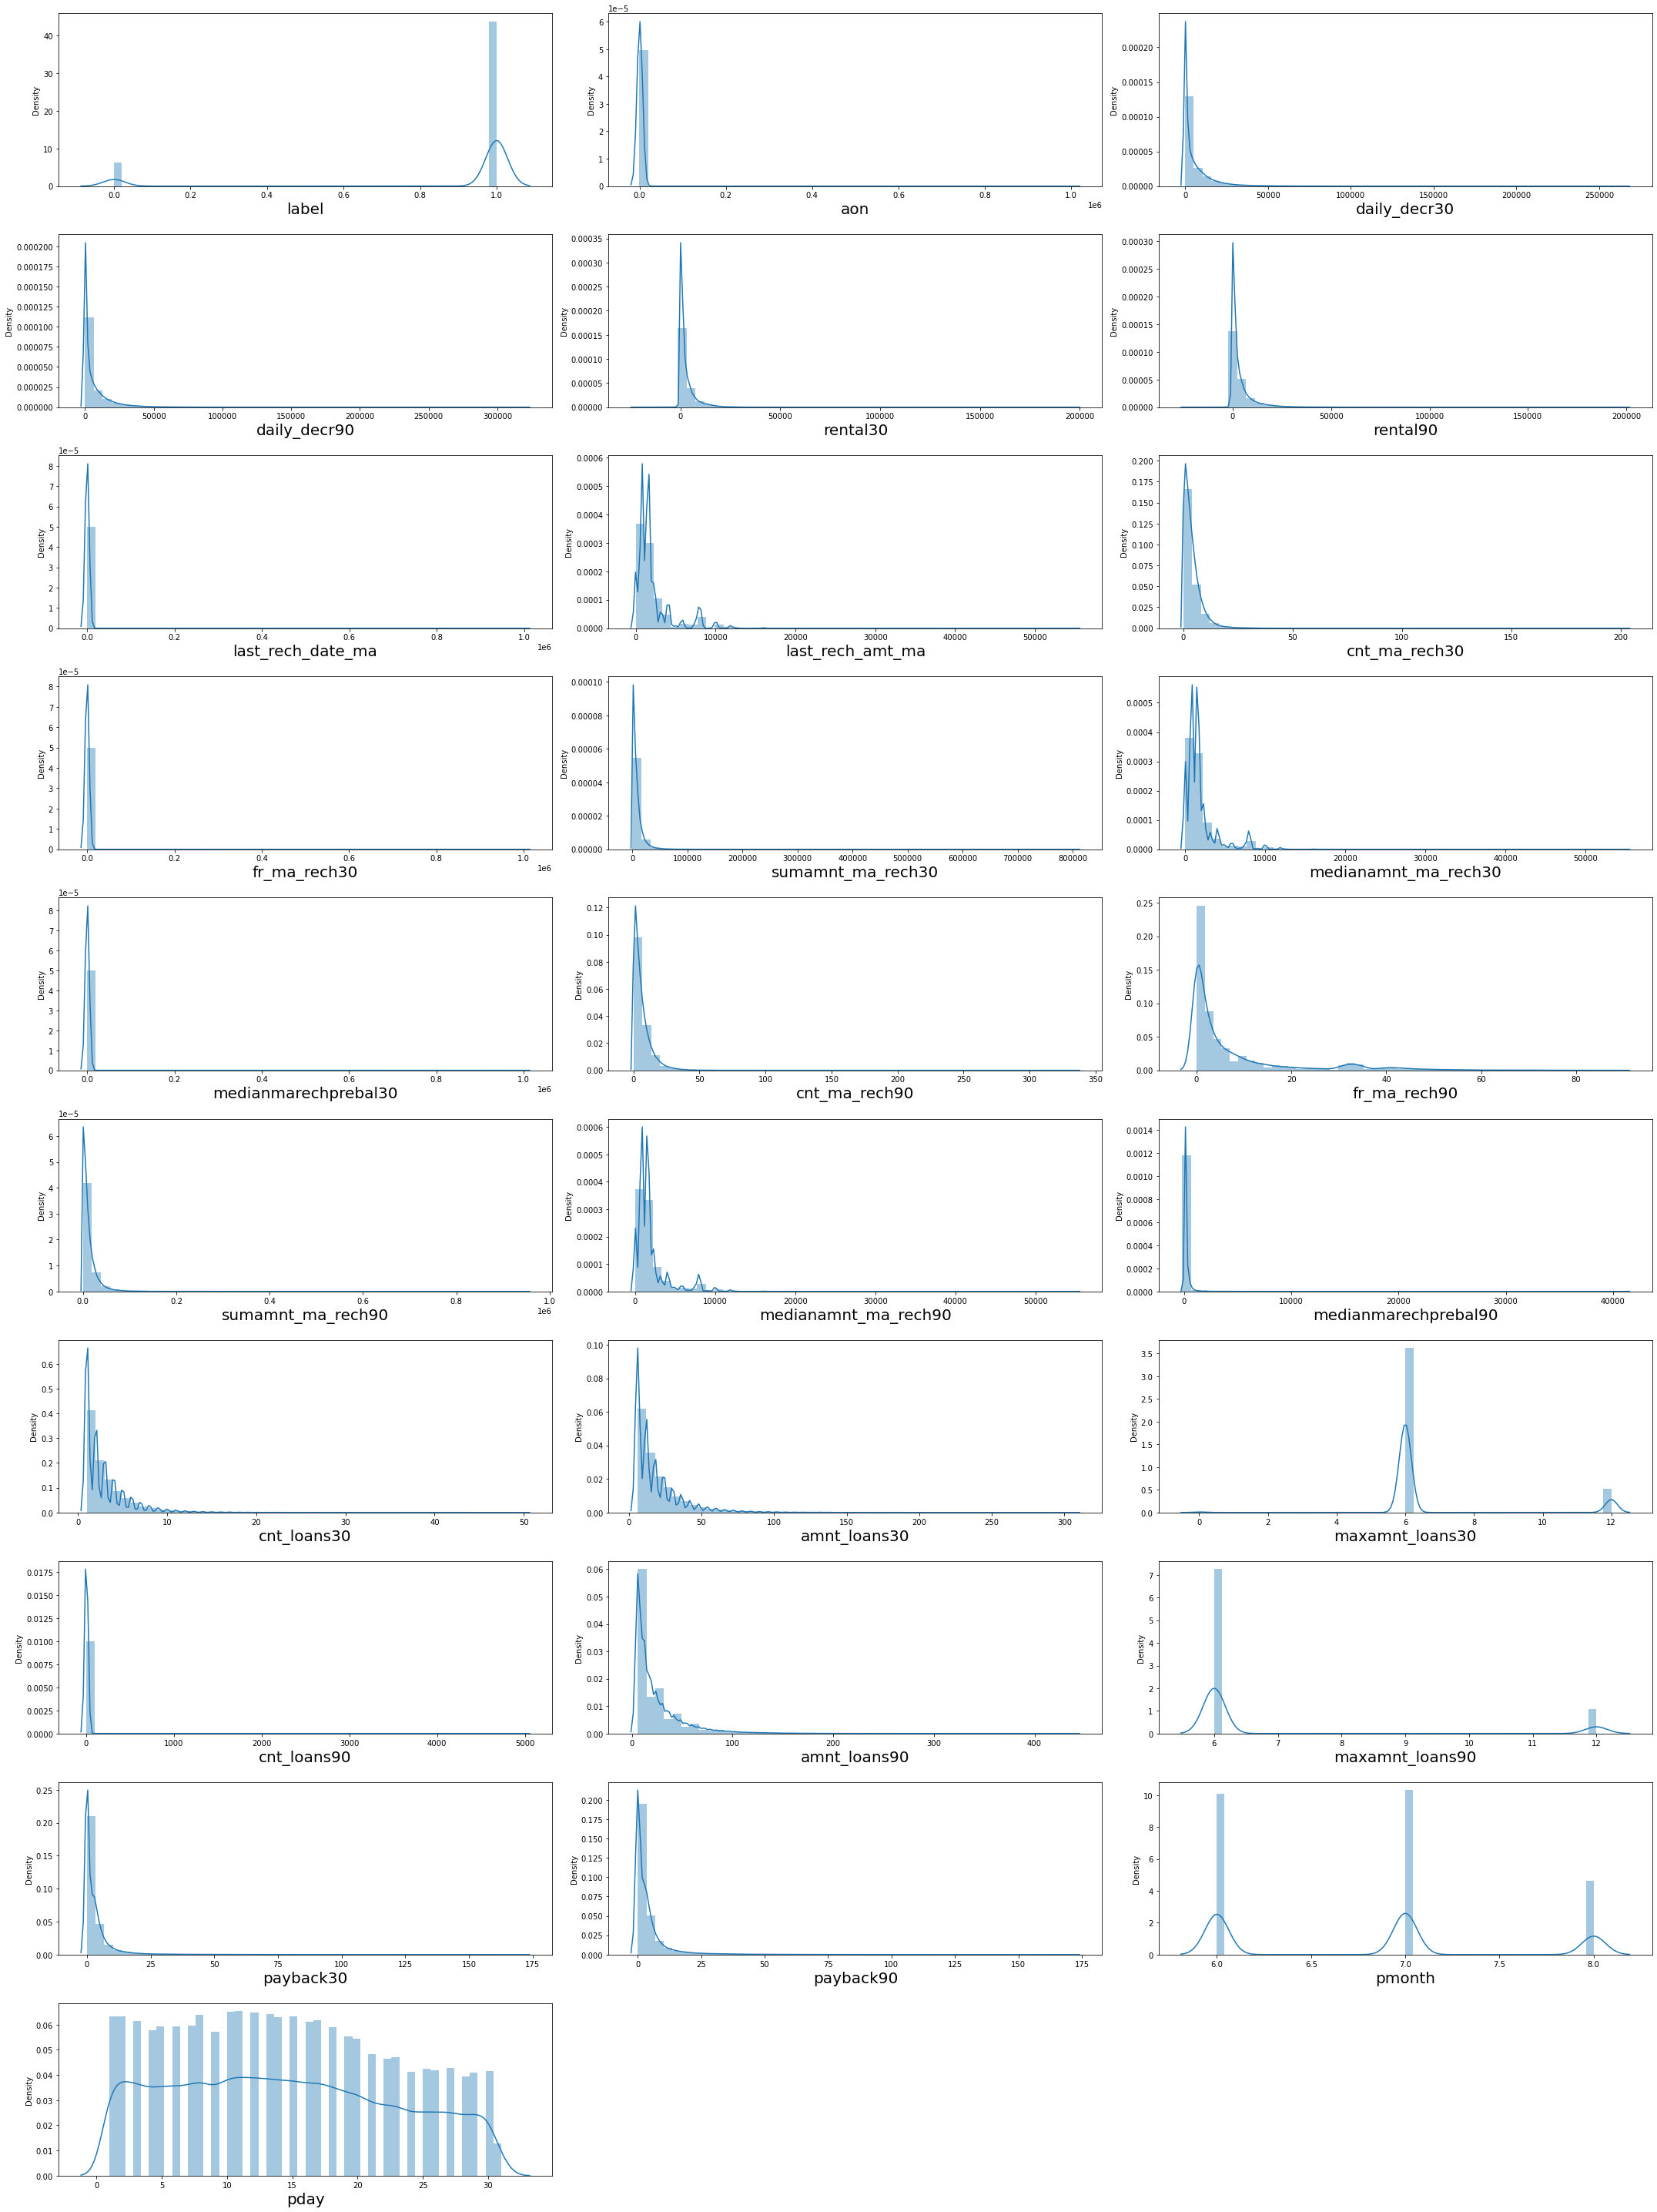

In [23]:
# distribution plot of numerical features
plt.figure(figsize=(30,40))
plotnumber=1
for column in numerical_features:
    if plotnumber <=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


<AxesSubplot:xlabel='label', ylabel='count'>

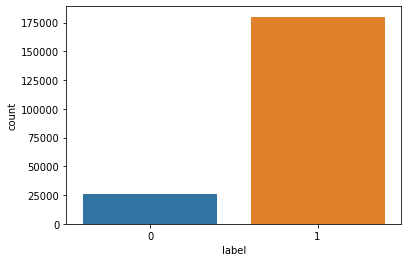

In [24]:
#count for target column
sns.countplot(df['label'])

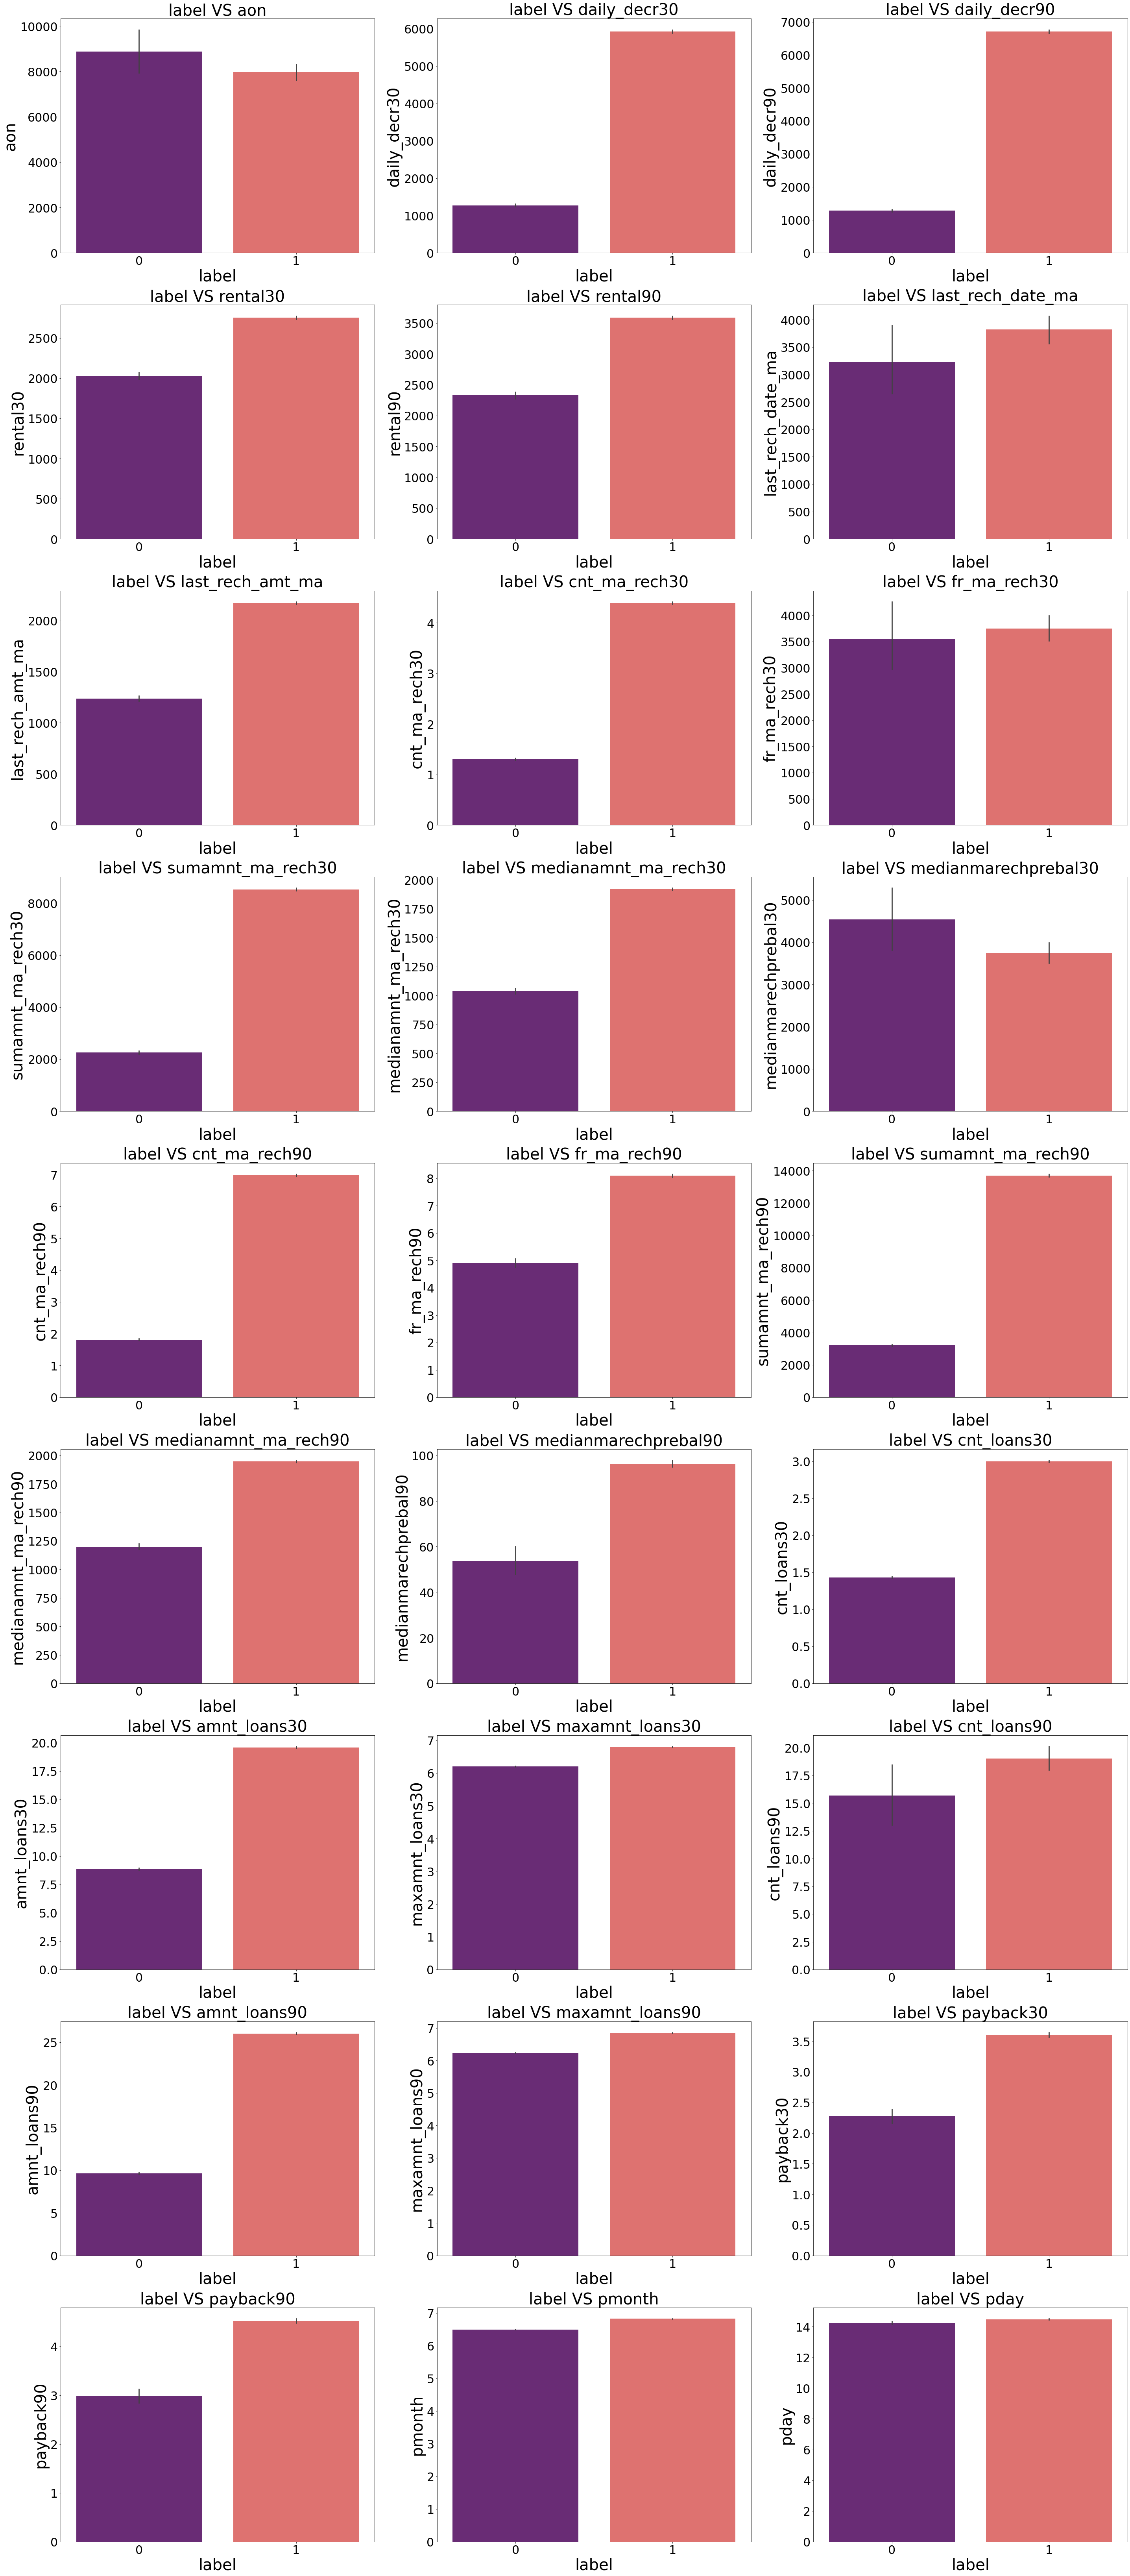

In [25]:
# Relation between target and other column :

col=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']

plt.figure(figsize=(40,100))
for i in range(len(col)):
    plt.subplot(10,3,i+1)
    sns.barplot(x=df['label'],y=df[col[i]],palette='magma')
    plt.title(f"label VS {col[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(col[i],fontsize = 40)
    plt.tight_layout()

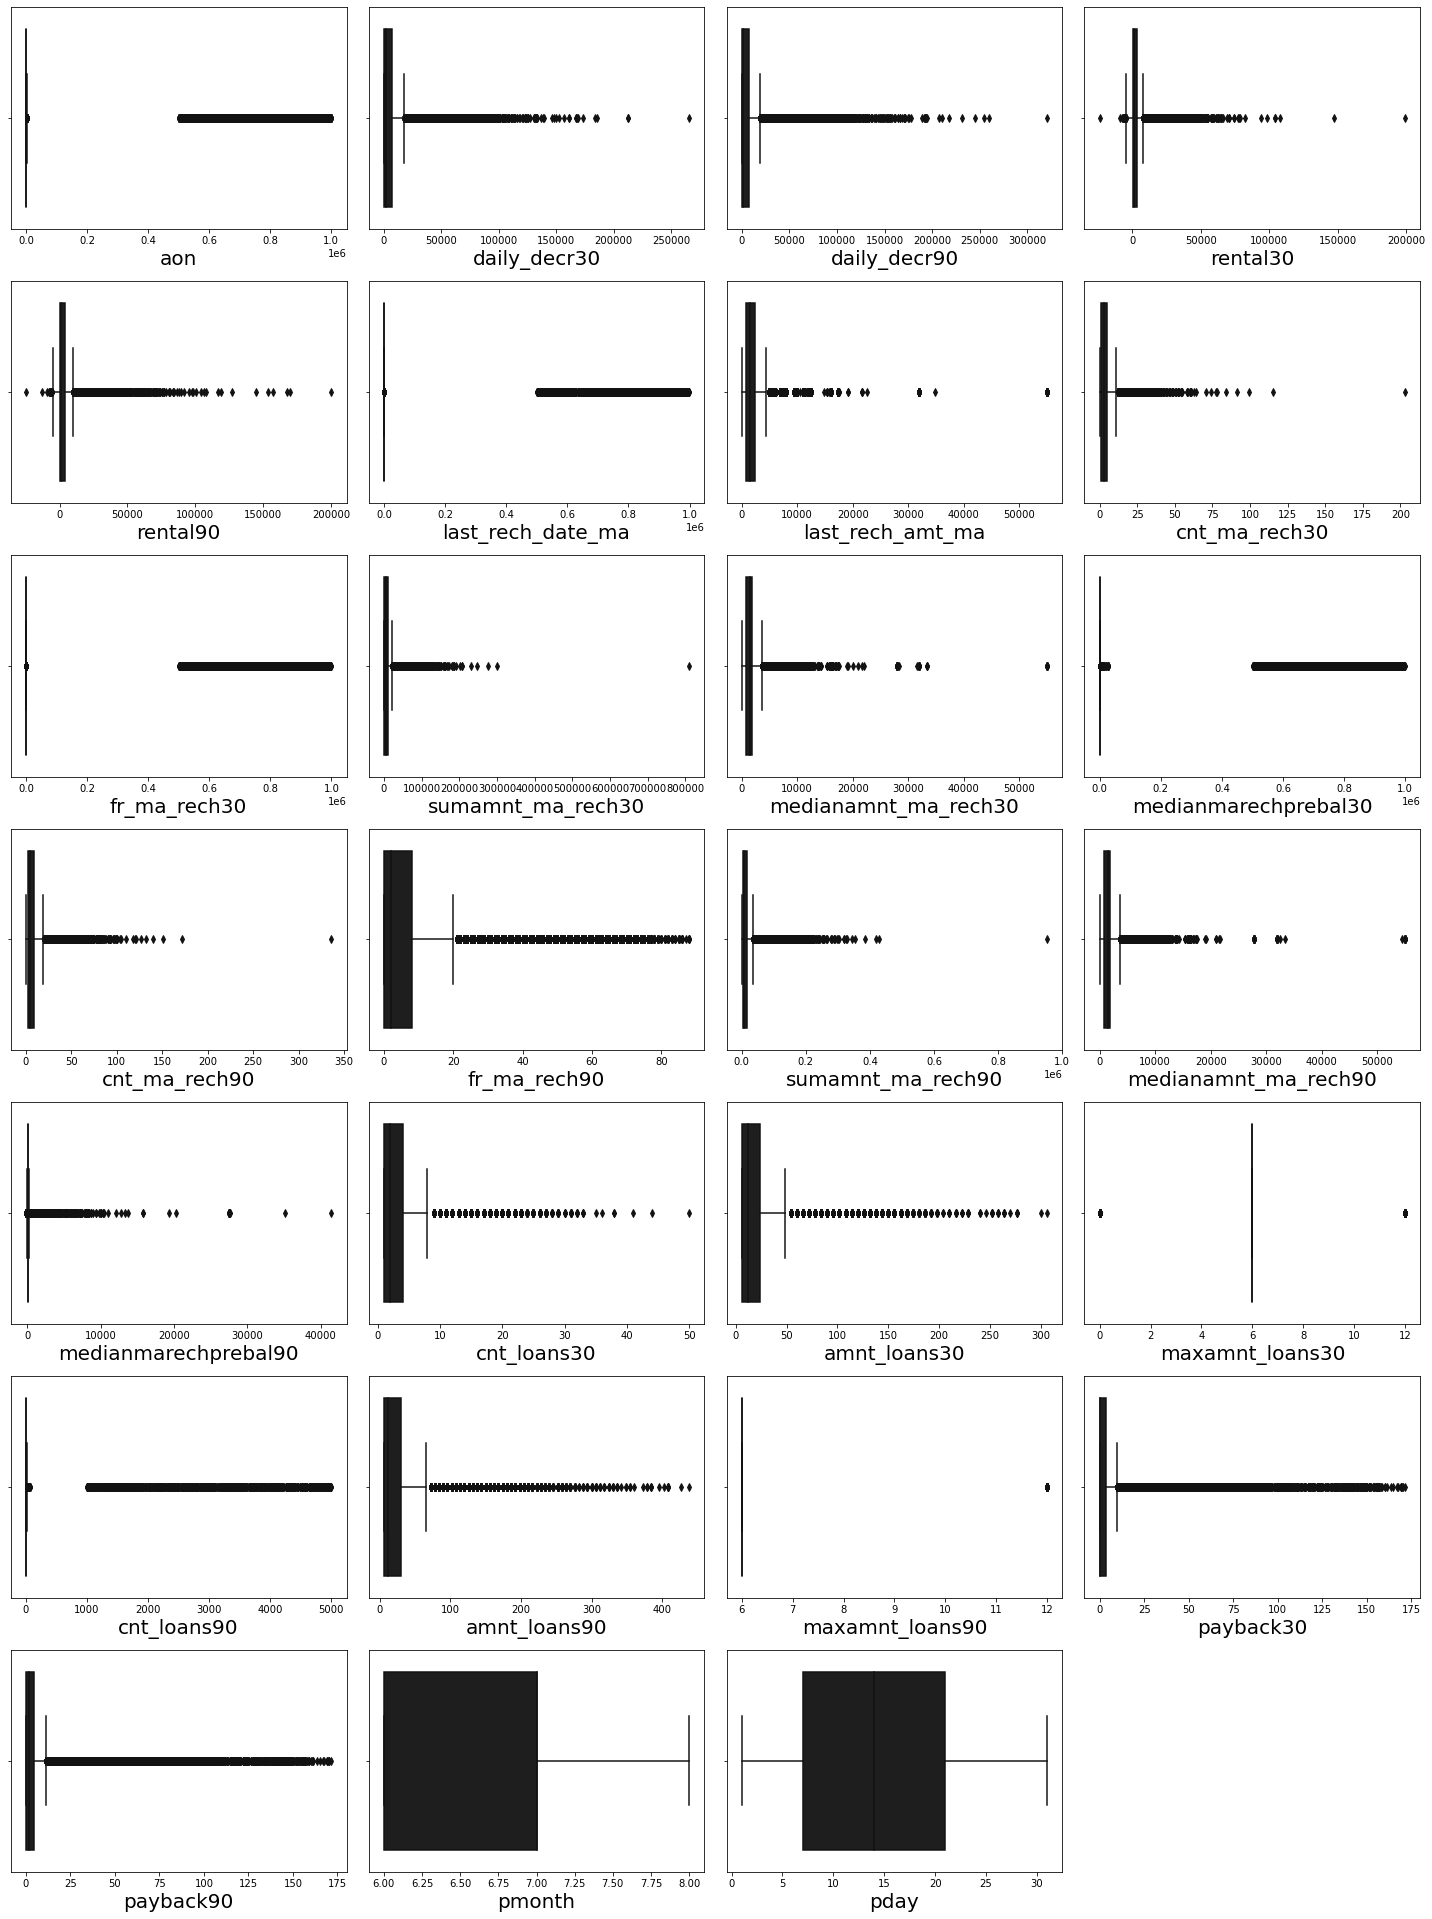

In [26]:
# Traget varible vs other column :

plt.figure(figsize=(20,30))
for i in range(len(col)):
    plt.subplot(8,4,i+1)
    sns.boxplot(df[col[i]], palette='icefire')
    plt.xlabel(col[i],fontsize =20)
    plt.tight_layout()

Text(0.5, 1.0, 'Correlation with target Variable that is label column')

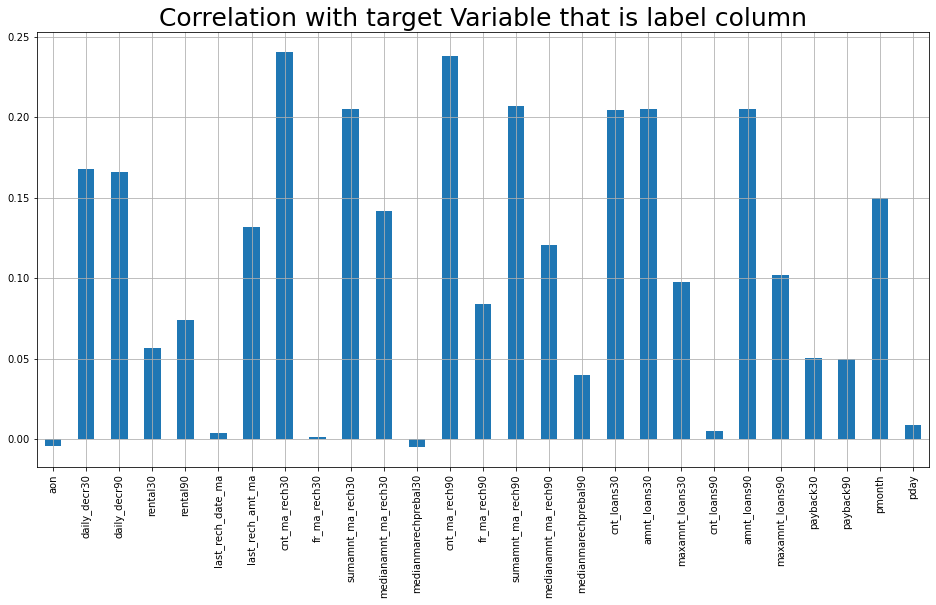

In [28]:
#Checking the correlation with target variable
plt.figure(figsize=(16,8))
df.drop('label', axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target Variable that is label column",fontsize=25)

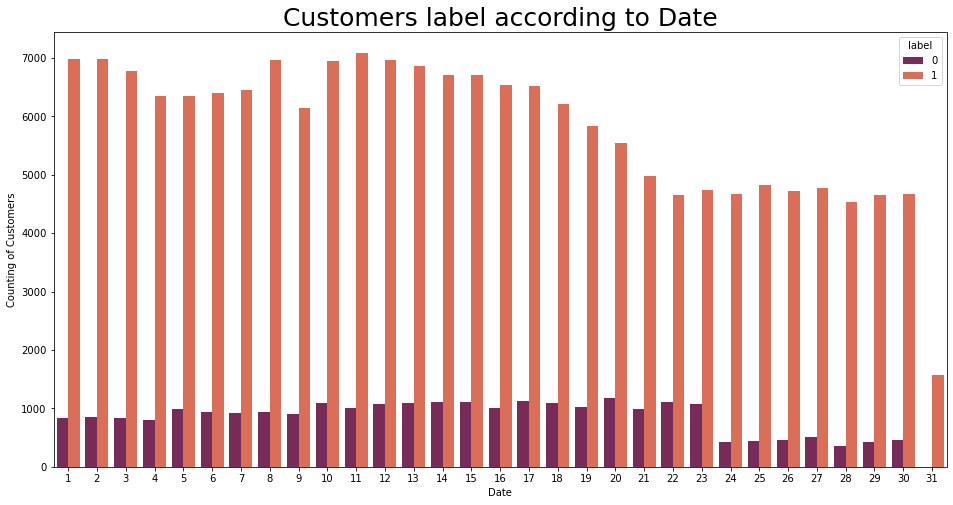

In [29]:
#Customer label according to per day:
plt.figure(figsize=(16,8))
sns.countplot(x="pday", hue='label', data=df, palette='rocket')
plt.title("Customers label according to Date", fontsize=25)
plt.xlabel('Date')
plt.ylabel('Counting of Customers')
plt.show()


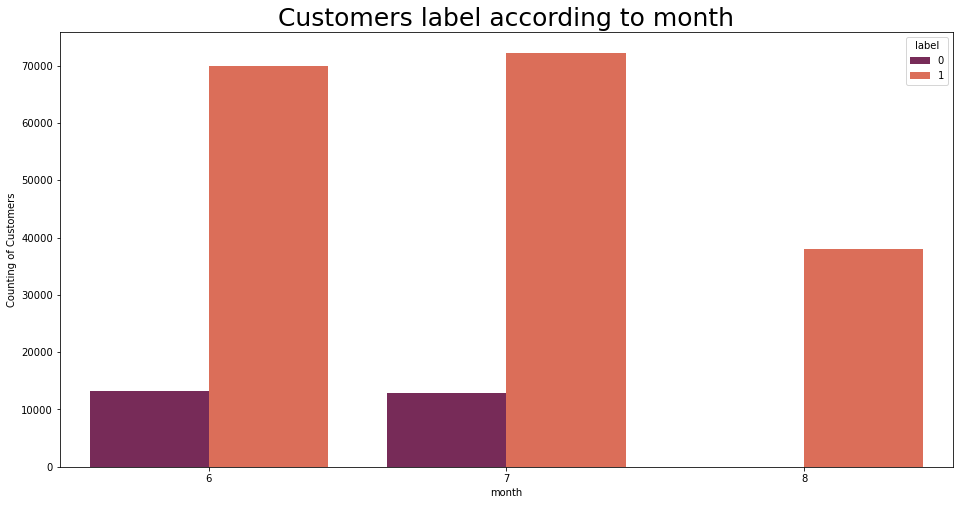

In [30]:
#Customer label according to month (date):
plt.figure(figsize=(16,8))
sns.countplot(x="pmonth", hue='label', data=df, palette='rocket')
plt.title("Customers label according to month", fontsize=25)
plt.xlabel('month')
plt.ylabel('Counting of Customers')
plt.show()

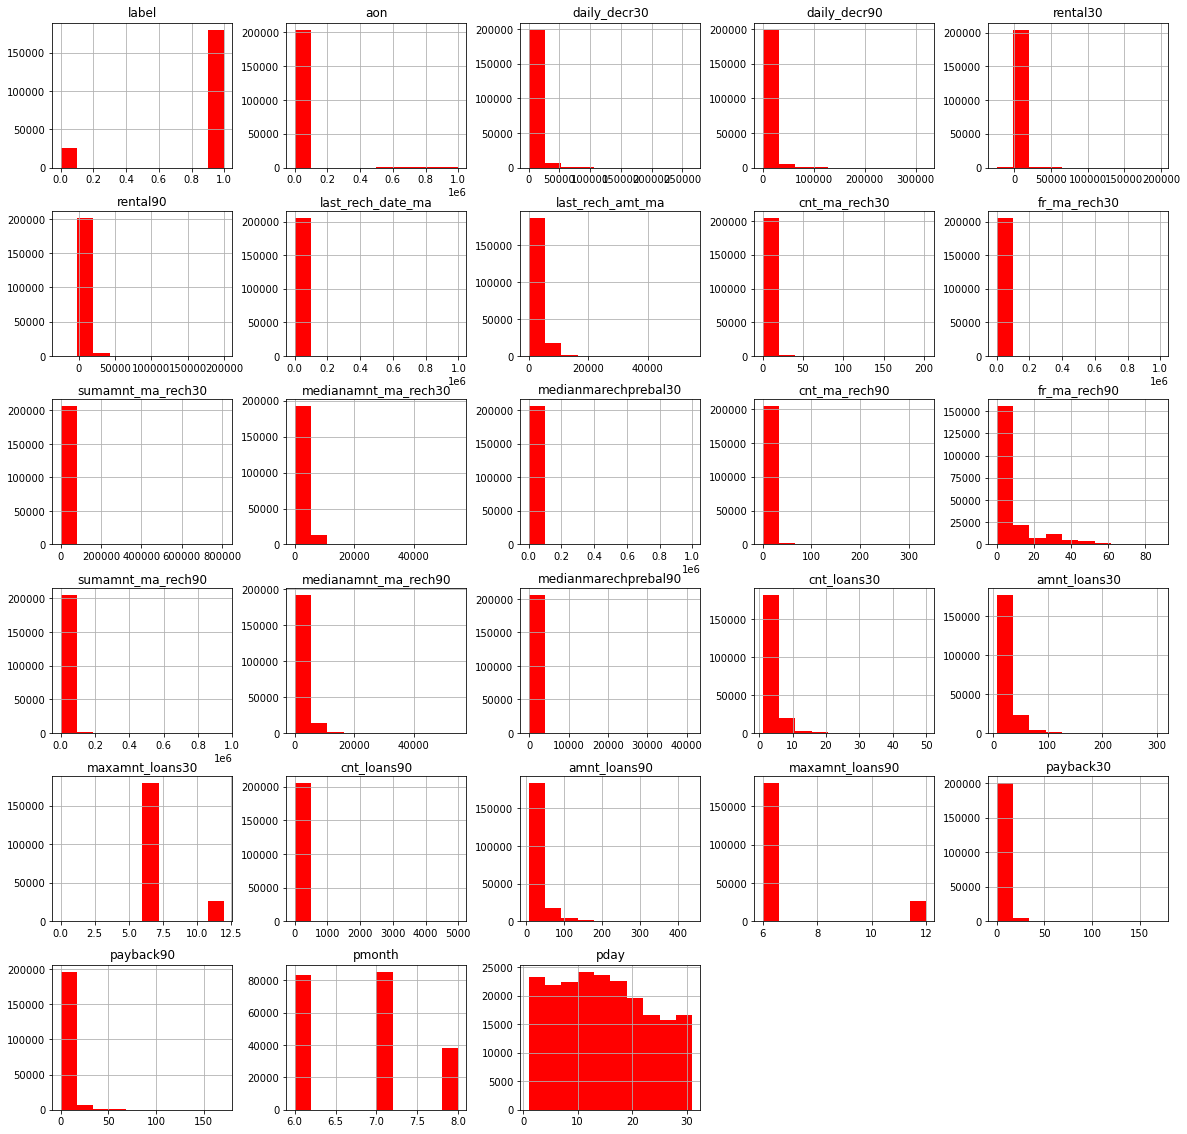

In [31]:
#Plotting the Histogram
df.hist(figsize=(20,20),color='r')
plt.show()

# Remove outliers

In [32]:
# feature contain outliers
featr=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pmonth', 'pday']]


# Z-score

In [33]:
from scipy.stats import zscore

z_score = zscore(df[['label']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
count,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,...,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000,206334.000000
mean,0.873206,8083.775238,5336.954688,6021.166259,2664.367446,3431.671363,3747.842543,2051.860580,4.000456,3724.804106,...,2.802558,18.235570,6.729216,18.603369,23.949897,6.772514,3.435019,4.324737,6.781485,14.448360
std,0.332743,75547.449680,9212.622214,10903.651687,4262.266027,5690.281853,53835.726141,2359.664033,4.270021,53578.005363,...,2.550769,17.368237,2.050286,224.999624,26.547094,2.009559,8.813884,10.250851,0.734527,8.411229
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,1.000000
25%,1.000000,246.000000,41.300000,41.484667,276.130000,299.700000,1.000000,770.000000,1.000000,0.000000,...,1.000000,6.000000,6.000000,1.000000,6.000000,6.000000,0.000000,0.000000,6.000000,7.000000
50%,1.000000,526.000000,1389.035666,1407.000000,1070.795000,1308.900000,3.000000,1539.000000,3.000000,2.000000,...,2.000000,12.000000,6.000000,2.000000,12.000000,6.000000,0.000000,1.705882,7.000000,14.000000
75%,1.000000,981.000000,7170.000000,7671.877500,3314.222500,4136.532500,7.000000,2309.000000,5.000000,6.000000,...,4.000000,24.000000,6.000000,5.000000,30.000000,6.000000,3.800000,4.500000,7.000000,21.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,55000.000000,203.000000,999606.368100,...,50.000000,306.000000,12.000000,4997.517944,438.000000,12.000000,171.500000,171.500000,8.000000,31.000000


In [34]:
# Z-score
from scipy.stats import zscore
z=np.abs(zscore(featr))
df_new=df[(z<3).all(axis=1)]
df_new.shape

(166096, 28)

In [35]:
#Seprate the categorical columns and Numerical columns
cat_df,num_df=[],[]

for i in df.columns:
    if df[i].dtype==object:
        cat_df.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        num_df.append(i)
    else: continue
        
print('Total Number of Feature::', df.shape[1])
print('Number of categorical features::', len(cat_df))
print('Number of Numerical Feature::', len(num_df))

Total Number of Feature:: 28
Number of categorical features:: 0
Number of Numerical Feature:: 28


In [36]:
corr_matrix = df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.240686
cnt_ma_rech90           0.238356
sumamnt_ma_rech90       0.206958
amnt_loans30            0.205401
amnt_loans90            0.205371
sumamnt_ma_rech30       0.205067
cnt_loans30             0.204850
daily_decr30            0.168122
daily_decr90            0.165735
pmonth                  0.149599
medianamnt_ma_rech30    0.142099
last_rech_amt_ma        0.131584
medianamnt_ma_rech90    0.120416
maxamnt_loans90         0.102042
maxamnt_loans30         0.097551
fr_ma_rech90            0.084324
rental90                0.073810
rental30                0.056722
payback30               0.050335
payback90               0.050024
medianmarechprebal90    0.039947
pday                    0.009148
cnt_loans90             0.004911
last_rech_date_ma       0.003710
fr_ma_rech30            0.001255
aon                    -0.003971
medianmarechprebal30   -0.004889
Name: label, dtype: float64

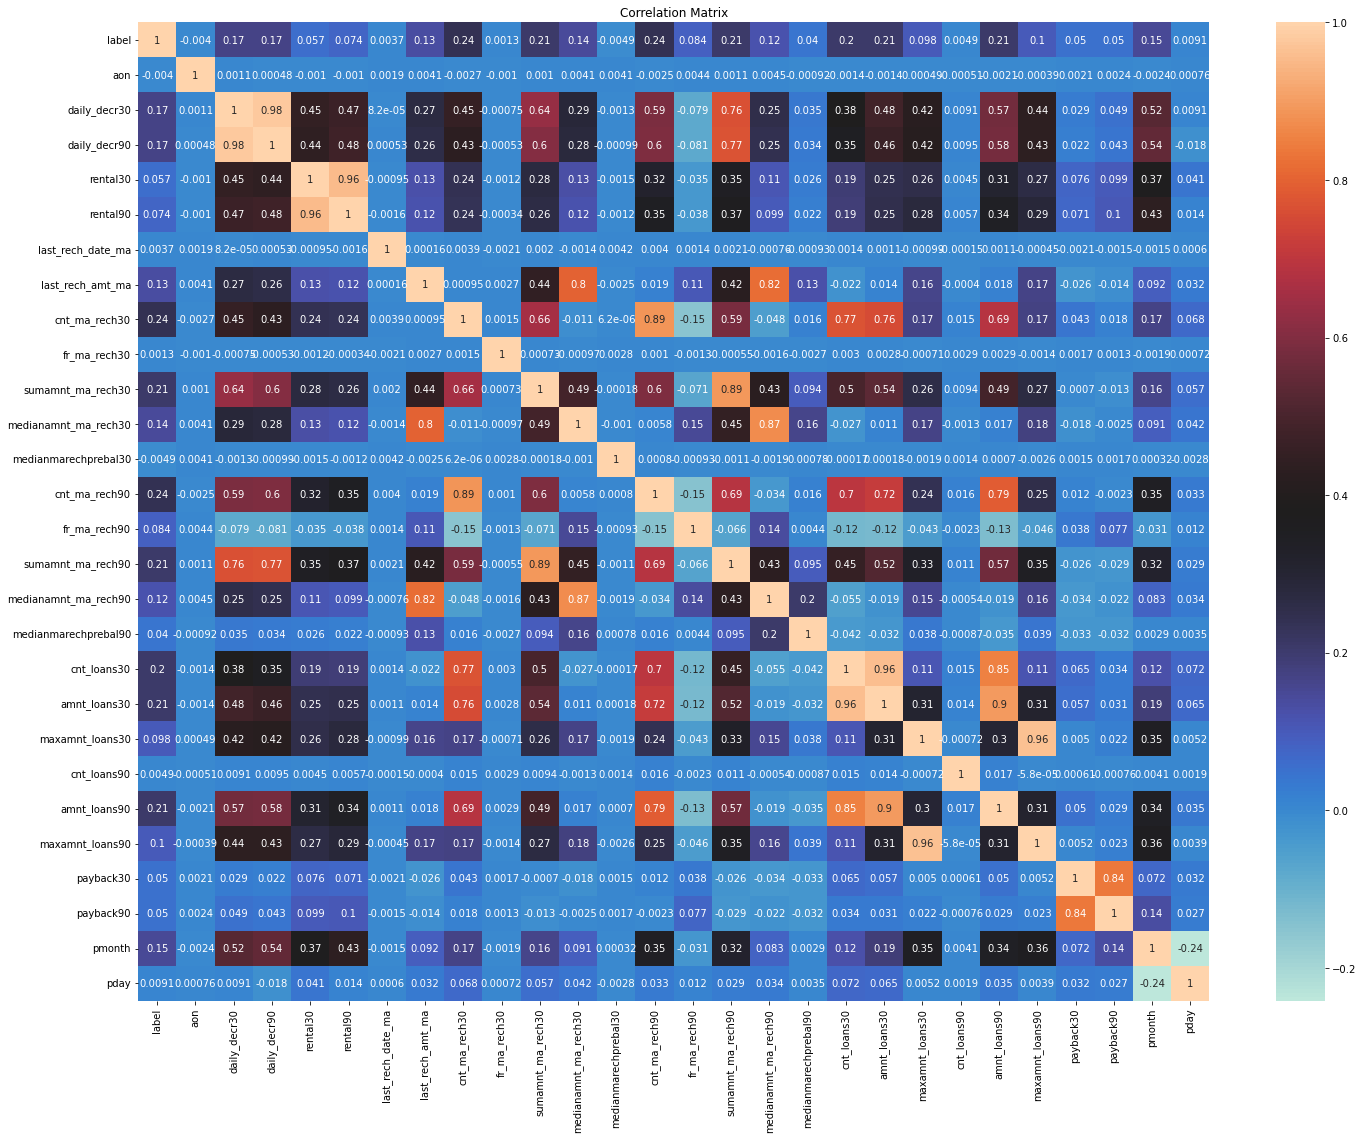

In [37]:
plt.figure(figsize=(24,18))
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title("Correlation Matrix")
plt.show()

In [38]:
x = df.drop(columns = ["label"], axis=1)
y = df["label"]

x.skew()

aon                     10.412316
daily_decr30             3.965795
daily_decr90             4.284159
rental30                 4.468993
rental90                 4.379261
last_rech_date_ma       14.802413
last_rech_amt_ma         3.838389
cnt_ma_rech30            3.276838
fr_ma_rech30            14.800651
sumamnt_ma_rech30        6.402651
medianamnt_ma_rech30     3.553197
medianmarechprebal30    14.778444
cnt_ma_rech90            3.427664
fr_ma_rech90             2.290585
sumamnt_ma_rech90        4.923172
medianamnt_ma_rech90     3.799376
medianmarechprebal90    45.512392
cnt_loans30              2.737129
amnt_loans30             2.997192
maxamnt_loans30          1.933942
cnt_loans90             16.573289
amnt_loans90             3.145134
maxamnt_loans90          2.216911
payback30                8.265049
payback90                6.897933
pmonth                   0.367412
pday                     0.175518
dtype: float64

In [39]:
# Remove skewness
fetr=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90']


In [42]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

df[fetr] = pt.fit_transform(df[fetr].values)

In [43]:
df[fetr].skew()

aon                     1.681185
daily_decr30           -6.827117
daily_decr90           -7.346018
rental30               -1.002671
rental90               -0.982559
last_rech_date_ma      -5.330199
last_rech_amt_ma       -0.064244
cnt_ma_rech30          -0.000629
fr_ma_rech30            0.162386
sumamnt_ma_rech30      -0.290936
medianamnt_ma_rech30   -0.187796
medianmarechprebal30   -0.135088
cnt_ma_rech90          -0.002572
fr_ma_rech90            0.145152
sumamnt_ma_rech90      -0.194656
medianamnt_ma_rech90   -0.048127
medianmarechprebal90    7.467146
cnt_loans30             0.223040
amnt_loans30            0.148341
maxamnt_loans30         0.233352
cnt_loans90             0.232384
amnt_loans90            0.132503
maxamnt_loans90         0.000000
payback30               0.283898
payback90               0.202892
dtype: float64

<AxesSubplot:>

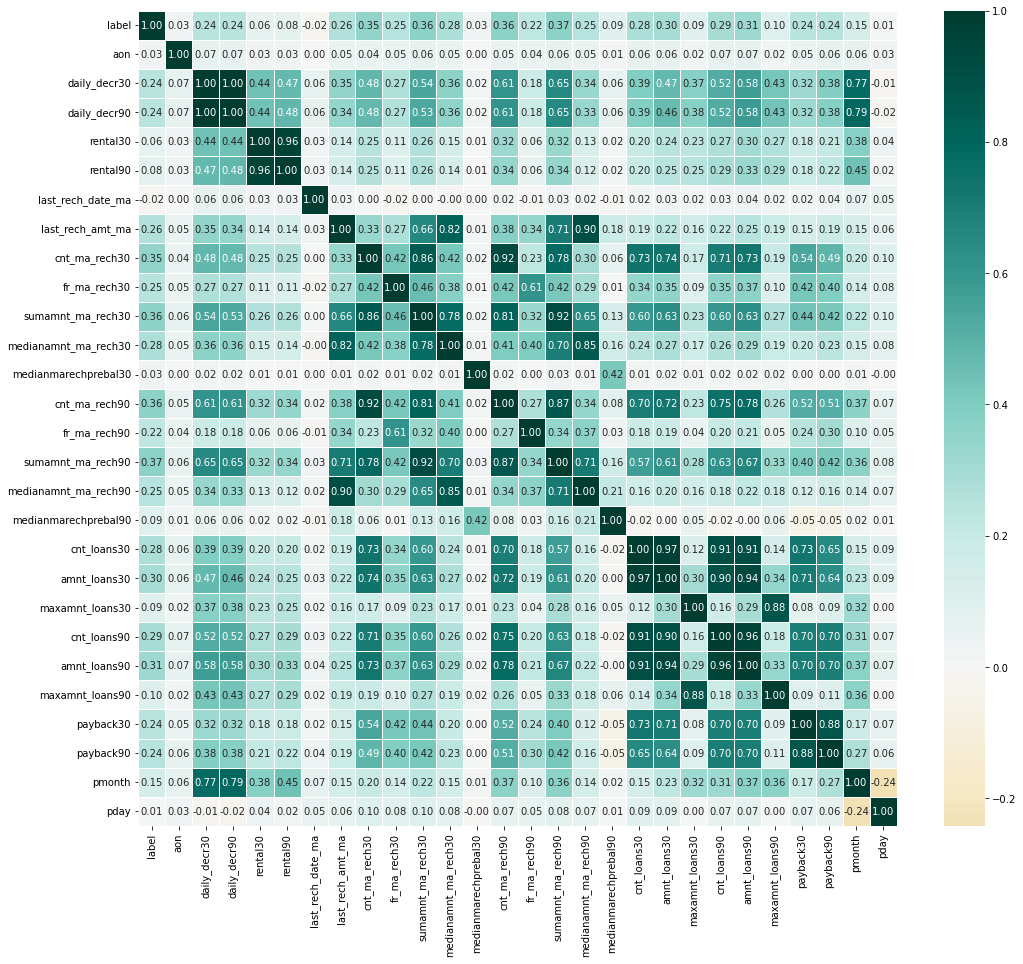

In [44]:
plt.figure(figsize=(17,15))
sns.heatmap(df.corr(),annot=True,cmap='BrBG',center=0,linewidth=0.5,fmt='0.2f')


[1.26794421 0.         0.         0.         0.         0.
 0.         0.         0.         8.73205579]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


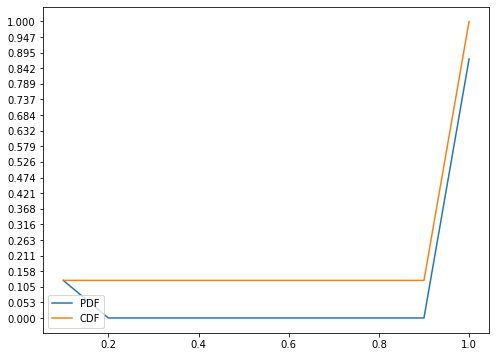

In [45]:
df_Price=df.loc[:,"label"]
count,bin_edges=np.histogram(df_Price,bins=10,density=True)  #density=True gives normalized form od bin_edges and count
print(count)
print(bin_edges)
PDF=count/sum(count)
CDF=np.cumsum(PDF)  #cdf is sum of all pdf values
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],PDF,label="PDF")
plt.plot(bin_edges[1:],CDF,label="CDF")
plt.yticks(np.linspace(0,1,20))
plt.legend(loc="lower left")
plt.show()

# Train - Test split:

In [46]:
x=df.drop('label',axis=1)
y=df['label']

y.value_counts()

1    180172
0     26162
Name: label, dtype: int64

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1 = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x1.head()

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pmonth,pday
0,0.534888,0.966544,0.967049,0.725917,0.769170,0.610111,0.266866,0.204521,0.663372,0.171604,...,0.330789,0.309809,0.70073,0.255334,0.267245,0.0,0.893891,0.851513,0.5,0.633333
1,0.546035,0.973303,0.973331,0.734437,0.776447,0.619771,0.439121,0.128915,0.000000,0.211218,...,0.000000,0.309809,1.00000,0.000000,0.267245,1.0,0.000000,0.000000,1.0,0.300000
2,0.542323,0.963612,0.964289,0.727894,0.770787,0.611248,0.266866,0.128915,0.000000,0.136007,...,0.000000,0.000000,0.70073,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.600000
3,0.533735,0.954757,0.955891,0.725712,0.768873,0.624583,0.221390,0.000000,0.000000,0.000000,...,0.330789,0.309809,0.70073,0.255334,0.267245,0.0,0.000000,0.000000,0.0,0.166667
4,0.550130,0.957780,0.958780,0.728417,0.771242,0.612192,0.311339,0.388016,0.319618,0.315115,...,0.762466,0.698102,0.70073,0.635768,0.632673,0.0,0.505471,0.437250,0.0,0.700000


In [48]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score,roc_auc_score,roc_curve
from imblearn.over_sampling import SMOTE

In [49]:
#Using Train-Test split:

x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=.30,random_state=42)

x_train.shape

(144433, 27)

# VIF (Inspect VIF Factors)

In [50]:
# For each X, calculate VIF and save in dataframe

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,110.3,aon
1,2650698.9,daily_decr30
2,2684678.2,daily_decr90
3,95568.6,rental30
4,96076.1,rental90
5,190.3,last_rech_date_ma
6,33.5,last_rech_amt_ma
7,218.1,cnt_ma_rech30
8,4.5,fr_ma_rech30
9,412.2,sumamnt_ma_rech30


# Accuracy_score of train-test

In [51]:
lg=LogisticRegression()
grid={'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=5,shuffle=False,random_state=None)
clf=GridSearchCV(lg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [52]:
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8765609602429686
[[  915  6890]
 [  751 53345]]
              precision    recall  f1-score   support

           0       0.55      0.12      0.19      7805
           1       0.89      0.99      0.93     54096

    accuracy                           0.88     61901
   macro avg       0.72      0.55      0.56     61901
weighted avg       0.84      0.88      0.84     61901



# Resampling:

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

In [53]:
# Apply smote for inbalance dataset

from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from collections import Counter
from imblearn.combine import SMOTETomek

In [54]:
sm=SMOTETomek(0.9)
X_train_sm,Y_train_sm=sm.fit_resample(x_train,y_train)
print('before under resampling{}'.format(Counter(y_train)))
print('after under resampling{}'.format(Counter(Y_train_sm)))

before under resamplingCounter({1: 126076, 0: 18357})
after under resamplingCounter({1: 124623, 0: 112015})


# For understanding sampling, Random sampling uses SMOTETomek for better result

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

Text(0.5, 1.0, 'After resampling dataset')

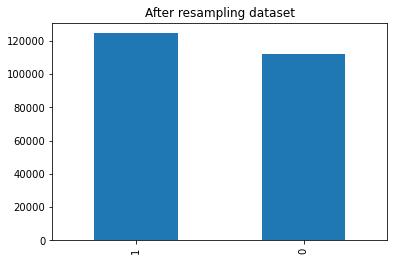

In [55]:
Y_train_sm.value_counts().plot(kind='bar')
plt.title('After resampling dataset')

In [56]:
clf.fit(X_train_sm,Y_train_sm)
y_pred=clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.75745141435518
[[ 5845  1960]
 [13054 41042]]
              precision    recall  f1-score   support

           0       0.31      0.75      0.44      7805
           1       0.95      0.76      0.85     54096

    accuracy                           0.76     61901
   macro avg       0.63      0.75      0.64     61901
weighted avg       0.87      0.76      0.79     61901



# Models :

Random Forest Classifier

Decision Tree Classifier

AdaBoost Classifier

GradientBoosting Classifier

Bagging Classifier

XGB Classifier

SGD Classifier

In [58]:
dtc=DecisionTreeClassifier()
sgd=SGDClassifier()
xgb=XGBClassifier(eval_metric='logloss')

In [59]:
def classifiers(f):
    f.fit(X_train_sm,Y_train_sm)
    print(f,'\n',f.score(X_train_sm,Y_train_sm)*100)
    f_pred=f.predict(x_test)
    scores=cross_val_score(f,X_train_sm,Y_train_sm,cv=5).mean()*100
    print('\n cross value score',scores)
    print('ACCURACY SCORE:\n',accuracy_score(y_test,f_pred)*100)
    print('ROC AUC SCORE:\n',roc_auc_score(y_test,f_pred)*100)
    print('CONFUSION MATRIX:\n',confusion_matrix(y_test,f_pred))
    print('CLASSIFICATION REPORT:\n',classification_report(y_test,f_pred))
    return

# Decision Tree Classifier

In [60]:
classifiers(dtc)

DecisionTreeClassifier() 
 99.99915482720442

 cross value score 90.32658905714793
ACCURACY SCORE:
 87.24091694802992
ROC AUC SCORE:
 76.62169844541444
CONFUSION MATRIX:
 [[ 4872  2933]
 [ 4965 49131]]
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      7805
           1       0.94      0.91      0.93     54096

    accuracy                           0.87     61901
   macro avg       0.72      0.77      0.74     61901
weighted avg       0.89      0.87      0.88     61901



# SGD Classifier

In [63]:
classifiers(sgd)

SGDClassifier() 
 75.44773028845746

 cross value score 75.3141919519186
ACCURACY SCORE:
 77.30085135942876
ROC AUC SCORE:
 74.27304373689427
CONFUSION MATRIX:
 [[ 5481  2324]
 [11727 42369]]
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.32      0.70      0.44      7805
           1       0.95      0.78      0.86     54096

    accuracy                           0.77     61901
   macro avg       0.63      0.74      0.65     61901
weighted avg       0.87      0.77      0.80     61901



# XGB Classifier

In [64]:
classifiers(xgb)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...) 
 95.11701417354779

 cross value score 93.33246030919801
ACCURACY SCORE:
 91.17300205166315
ROC AUC SCORE:
 80.05548597875493
CONFUSION MATRIX:
 [[ 5088  2717]
 [ 2747 51349]]
CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.65   

In [65]:
ensemble=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in ensemble:
    i.fit(X_train_sm,Y_train_sm)
    print(i,'\n score: ',i.score(X_train_sm,Y_train_sm)*100)
    pred=i.predict(x_test)
    print(' F1 score:',f1_score(y_test,pred)*100)
    print('Accuracy scoer:',accuracy_score(y_test,pred)*100)
    scores=cross_val_score(i,X_train_sm,Y_train_sm,cv=5).mean()*100
    print('\n Cross value score',scores)
    print('Confusion_matrix:\n',confusion_matrix(y_test,pred))
    print('Classification report:\n',classification_report(y_test,pred))
    print('\n')

RandomForestClassifier() 
 score:  99.99704189521547
 F1 score: 94.75966349182818
Accuracy scoer: 90.8628293565532

 Cross value score 94.58118859624291
Confusion_matrix:
 [[ 5107  2698]
 [ 2958 51138]]
Classification report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64      7805
           1       0.95      0.95      0.95     54096

    accuracy                           0.91     61901
   macro avg       0.79      0.80      0.80     61901
weighted avg       0.91      0.91      0.91     61901



AdaBoostClassifier() 
 score:  85.28427386979268
 F1 score: 89.62669504888048
Accuracy scoer: 82.9954281837127

 Cross value score 85.079748576978
Confusion_matrix:
 [[ 5902  1903]
 [ 8623 45473]]
Classification report:
               precision    recall  f1-score   support

           0       0.41      0.76      0.53      7805
           1       0.96      0.84      0.90     54096

    accuracy                           0.83     61901
   ma

# Hyperparameter Tuning

In [66]:
n_estimators=[int(x) for x in np.linspace(start=0,stop=100,num=10)]
max_features=['auto','sqrt','log2']
criterion=['gini','entropy']
max_depth=[2,4]
min_samples_split=[1,2]
bootstrap=[True,False]

In [67]:
para_grid={'n_estimators':n_estimators,
          'max_features':max_features,
          'criterion':criterion,
          'max_depth':max_depth,
          'min_samples_split':min_samples_split,
          'bootstrap':bootstrap}

In [68]:
grid=GridSearchCV(RandomForestClassifier(),para_grid,n_jobs=-1)
grid.fit(X_train_sm,Y_train_sm)
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 33}

# ROC & AUC SCORE:

In [69]:
rf=RandomForestClassifier(bootstrap=False,criterion='gini',max_depth=None,max_features='sqrt',min_samples_split=7,n_estimators=77)
rf.fit(X_train_sm,Y_train_sm)
pred_rf=rf.predict(x_test)
print(accuracy_score(y_test,pred_rf))
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))


0.9109545887788566
[[ 4911  2894]
 [ 2618 51478]]
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      7805
           1       0.95      0.95      0.95     54096

    accuracy                           0.91     61901
   macro avg       0.80      0.79      0.79     61901
weighted avg       0.91      0.91      0.91     61901



In [70]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

fpr,tpr,thresold=roc_curve(y_test,y_pred_prob)

ROC AUC SCORE:  79.04082992136219


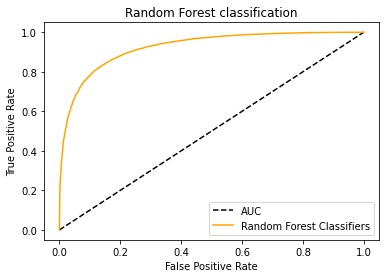

In [71]:
#Ploting ROC curve for final model
plt.plot([0,1],[0,1],'k--',label='AUC')
plt.plot(fpr,tpr,label='Random Forest Classifiers',color='orange',)
print("ROC AUC SCORE: ",roc_auc_score(y_test,pred_rf)*100)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest classification')
plt.legend()
plt.show()

# Saving best model

In [72]:
# Saving best model
import joblib
joblib.dump(rf,'Microcredit.plk')

['Microcredit.plk']

In [73]:
# Loading the saved model
model=joblib.load("Microcredit.plk")

# Prediction

In [74]:
prediction = model.predict(x_test)
prediction=pd.DataFrame(prediction)
prediction

,0
0,1
1,1
2,1
3,1
4,1
...,...
61896,1
61897,1
61898,1
61899,1
